In [1]:
# Lets suppose if you have more frequent categories. we just replace NaN with a new category

In [2]:
# Read loan data with 4 columns and replace NaN with Missing

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
pd.set_option("display.max_columns",None)

In [16]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu', 'GarageType'] )

In [17]:
df

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,NaN,Attchd


In [18]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
dtype: int64

<AxesSubplot:>

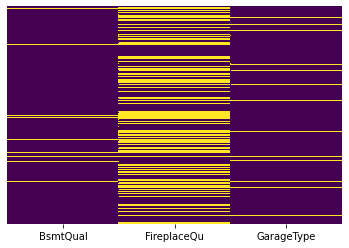

In [22]:
# lets see missing values through heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
# create new column where non null value is same and NaN value is replaced by Missing

def impute_nan(df,variable):
    df[variable +'_impute_NaN']= np.where(df[variable].isnull(),"Missing",df[variable])

In [29]:
# calling func for all 3 columns
for i in df.columns:
    impute_nan(df,i)

In [31]:
df.isnull().sum()

BsmtQual                   37
FireplaceQu               690
GarageType                 81
BsmtQual_impute_NaN         0
FireplaceQu_impute_NaN      0
GarageType_impute_NaN       0
dtype: int64

In [34]:
# now we can delete old columns

df.drop(['BsmtQual','FireplaceQu', 'GarageType'], axis=1, inplace=True)

In [35]:
df

,BsmtQual_impute_NaN,FireplaceQu_impute_NaN,GarageType_impute_NaN
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd
...,...,...,...
1455,Gd,TA,Attchd
1456,Gd,TA,Attchd
1457,TA,Gd,Attchd
1458,TA,Missing,Attchd
